In [91]:
import tensorflow as tf
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3 , preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

print(tf.__version__)

2.4.1


In [92]:
train_size = [224 , 224]

train_path = '/content/drive/MyDrive/MyShares/Tomatos/train'
val_path =  '/content/drive/MyDrive/MyShares/Tomatos/valid'

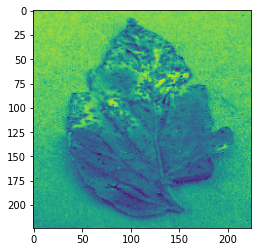

In [93]:
path = '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Bacterial_spot'

for image_1 in os.listdir(path):
  image_array = cv2.imread(os.path.join(path , image_1) , cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(image_array , (train_size[0]  , train_size[0] ))
  plt.imshow(new_array)
  plt.show()
  break
  

In [94]:
inception = InceptionV3(input_shape=train_size+ [3], include_top=False , weights='imagenet')

In [95]:
for layer in inception.layers:
  layer.trainable = False

In [96]:
from glob import glob

folders = glob('/content/drive/MyDrive/MyShares/Tomatos/train/*')

folders

['/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Early_blight',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___healthy',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Late_blight',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Bacterial_spot']

In [97]:
num_of_classes = len(folders)
print(num_of_classes)

10


In [98]:
x = Flatten()(inception.output)
x = Dense(num_of_classes , activation = 'softmax')(x)

model = Model(inputs = inception.input , outputs = x)

In [99]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [77]:
from tensorflow.keras.optimizers import Adam

adam = Adam(lr = 0.001)

model.compile(optimizer = adam , loss = 'categorical_crossentropy' ,
              metrics = ['accuracy'])

In [78]:
training_batch_size = 512
val_batch_size = 128



train_datagen = ImageDataGenerator(rescale=1./255 , shear_range=0.2 , 
                                   zoom_range=0.2 , horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path , target_size = (224 , 224) , 
                                                 batch_size = training_batch_size ,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(val_path , target_size = (224 , 224) ,
                                          batch_size = val_batch_size ,
                                          class_mode = 'categorical')


print(len(training_set))
print(len(val_set))

Found 18349 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
36
36


In [79]:

history = model.fit(training_set , validation_data=val_set , epochs = 15 , 
                              steps_per_epoch=len(training_set),
                              validation_steps = len(val_set) , verbose = 1)

Epoch 1/15
36/36 [==============================] - 236s 6s/step - loss: 17.5282 - accuracy: 0.2370 - val_loss: 2.9992 - val_accuracy: 0.5839
Epoch 2/15
36/36 [==============================] - 230s 6s/step - loss: 1.8924 - accuracy: 0.6835 - val_loss: 0.8058 - val_accuracy: 0.7836
Epoch 3/15
36/36 [==============================] - 227s 6s/step - loss: 0.6466 - accuracy: 0.8187 - val_loss: 0.5506 - val_accuracy: 0.8266
Epoch 4/15
36/36 [==============================] - 229s 6s/step - loss: 0.4401 - accuracy: 0.8612 - val_loss: 0.4822 - val_accuracy: 0.8310
Epoch 5/15
36/36 [==============================] - 227s 6s/step - loss: 0.3641 - accuracy: 0.8777 - val_loss: 0.4462 - val_accuracy: 0.8543
Epoch 6/15
36/36 [==============================] - 229s 6s/step - loss: 0.3221 - accuracy: 0.8892 - val_loss: 0.4062 - val_accuracy: 0.8589
Epoch 7/15
36/36 [==============================] - 228s 6s/step - loss: 0.2825 - accuracy: 0.9034 - val_loss: 0.3402 - val_accuracy: 0.8818
Epoch 8/15
3

In [80]:
model.save('/content/drive/MyDrive/MyShares/Tomatos/tomato_leaf_disease.h5')

In [100]:
model.load_weights('/content/drive/MyDrive/MyShares/Tomatos/tomato_leaf_disease.h5')

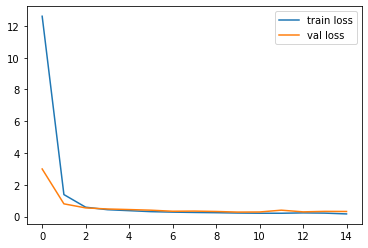

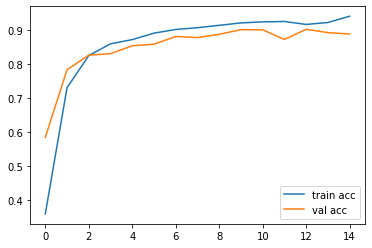

<Figure size 432x288 with 0 Axes>

In [101]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [123]:
from tensorflow.keras.preprocessing.image import img_to_array
import os

def prepare_for_pred(filepath):
  img = load_img(filepath , target_size=(224,224))
  img_arr = img_to_array(img)
  #img_arr = img_arr/255.
  img_arr=np.expand_dims(img_arr,axis=0)
  return img_arr


# prediction = model.predict(prepare_for_pred('/content/drive/MyDrive/MyShares/Tomatos/test/healthy.JPG'))
# print(prediction)
# print(np.argmax(prediction[0]))

test_list_path = '/content/drive/MyDrive/MyShares/Tomatos/test'
for image in os.listdir(test_list_path):
  image_array = cv2.imread(os.path.join(test_list_path , image) , cv2.IMREAD_GRAYSCALE)
  pred = model.predict(prepare_for_pred(os.path.join(test_list_path , image)))
  predc = np.argmax(pred , axis = 1)
  print('the predicted class is  ' ,  folders[predc[0]].split('___')[1])

the predicted class is   Early_blight
the predicted class is   Spider_mites Two-spotted_spider_mite
the predicted class is   Bacterial_spot
the predicted class is   Early_blight
